In [1]:
#!pip install fbprophet

In [8]:
import pandas as pd
from flask import Flask, request, render_template, jsonify
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name
import pandas as pd

In [9]:
from flask import Flask, request, render_template, jsonify
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name
import pymysql
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine

In [10]:
import pymysql
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
import requests
import json

In [12]:
pymysql.install_as_MySQLdb()
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")

In [13]:
pymysql.install_as_MySQLdb()
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")
conn = engine.connect()

## Part 3: Covid-19 Pandemic (2020)

In [14]:
historical_period = "2018-2020"
prediction_period = "2020-2021"
index = "DJones"

query = '''
select * from DJones
where Date > "2014-01-01" and Date < "2020-04-30"
'''

data = pd.read_sql(query, conn)
covid_historic_DJ = data[['Date', 'Close']]
covid_historic_DJ.head()

,Date,Close
0,2014-01-02,16441
1,2014-01-03,16470
2,2014-01-06,16425
3,2014-01-07,16531
4,2014-01-08,16463


In [19]:
#covid_historic_DJ.to_sql(name = "covid_historic_DJ", if_exists="append", con=conn, index=False)

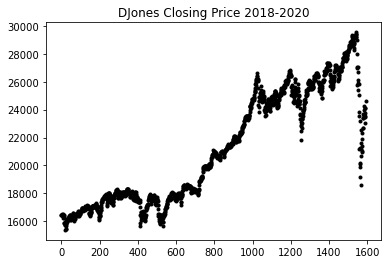

In [15]:
df_close = data['Close']
df_close.plot(style='k.')
plt.title(f'{index} Closing Price {historical_period}')
plt.show()

In [16]:
data = data[['Date', 'Close']]

data = data.rename(columns = {"Date":"ds","Close":"y"})
#data.tail()

from fbprophet import Prophet

m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data)

future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [17]:
covid_predict_DJ = prediction[['ds', 'trend', 'yhat_lower', 'yhat_upper']]
covid_predict_DJ.tail()

,ds,trend,yhat_lower,yhat_upper
1952,2021-04-25,27872.152707,25747.885654,29061.401780
1953,2021-04-26,27874.531290,25655.918088,29019.972345
1954,2021-04-27,27876.909873,25672.404045,29030.226203
1955,2021-04-28,27879.288456,25697.374032,29000.942172
1956,2021-04-29,27881.667039,25647.668823,28997.378019


In [21]:
#covid_predict_DJ.to_sql(name = 'covid_predict_DJ', if_exists='append', con=conn, index=False)

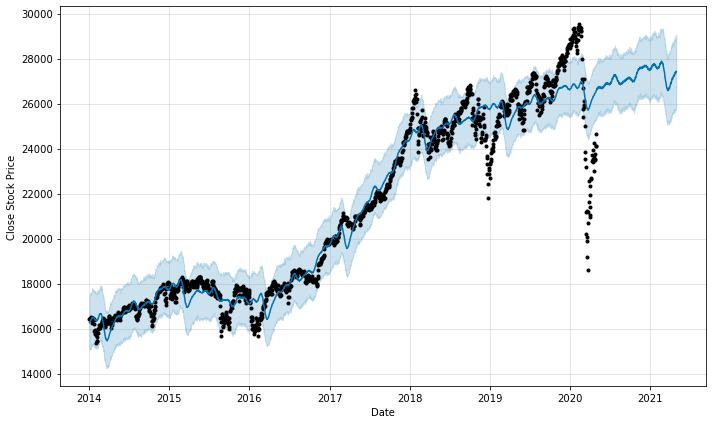

In [161]:
figure = m.plot(prediction)
#plt.title(f"{index} Prediction - {prediction_period}")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()
#figure.savefig(f'../static/images/{index}_{prediction_period}.png')